In [138]:
import pandas as pd
import numpy as np
import lightgbm as lgb

from os import listdir
from tqdm import tqdm

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import StratifiedKFold, ParameterSampler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

intput_path = "../input/"
output_path = "../output/"

In [ ]:
# df = pd.read_csv(output_path+"nn_aug_92303_12_test.csv")
# np.save(output_path+"nn_aug_92303_12_test.npy",df.target)

In [139]:
npys = [f for f in sorted(listdir(output_path)) if f.endswith("_oof.npy") and f[0]!="!" and "nn" in f]
npys

['nn_0.9163_oof.npy',
 'nn_0_0.92269_oof.npy',
 'nn_1_0.92217_oof.npy',
 'nn_1_0.92273_oof.npy',
 'nn_2_0.92128_oof.npy',
 'nn_3_0.92287_oof.npy',
 'nn_aug_0.92303_12_oof.npy']

In [140]:
path = output_path+"predictions/train/"
csvs = [f for f in sorted(listdir(path)) if f.endswith(".csv")][-7:-1]
csvs

['9199_xgboost_unique_10x_upsample_0104062006.csv',
 '9202_separate_feature_models_threshold_0.84_10fold_04042353.csv',
 '9211_catboost_unique_with_10x_upsample_3103172847.csv',
 '9212_catboost_unique_10x_upsample_5_balancer_0204172825.csv',
 '9215_catboost_unique_10x_upsample_3_balancer_0204145755.csv',
 '9222_catboost_multiplied_counter_10_folds_0504034846.csv']

In [141]:
scaler = StandardScaler() #MinMaxScaler StandardScaler

dt = pd.DataFrame()

df = pd.read_csv(intput_path+'train.csv.zip')
df = df[["target"]]

cols = []
for file in tqdm(npys):
    train = np.load(output_path+file).reshape(-1, 1)
    col = file[:-4]
    cols.append(col)
    df[col] = scaler.fit_transform(train)
    df[col] = df[col].rank()/len(df)
    
    test = np.load(output_path+file.replace("_oof.npy","_test.npy")).reshape(-1, 1)
    dt[col] = [x[0] for x in scaler.transform(test)]
    dt[col] = dt[col].rank()/len(dt)
    
for file in tqdm(csvs):
    train = pd.read_csv(path+file)["target"].values.reshape(-1, 1)
    col = file[:-4]
    cols.append(col)
    df[col] = scaler.fit_transform(train)
    df[col] = df[col].rank()/len(df)
    
    test = pd.read_csv((path+file).replace("/train/","/test/"))["target"].values.reshape(-1, 1)
    dt[col] = [x[0] for x in scaler.transform(test)]
    dt[col] = dt[col].rank()/len(dt)
    
df["avg"] = df[cols].mean(axis=1)
dt["avg"] = dt[cols].mean(axis=1)

dt.tail()

100%|██████████| 6/6 [00:02<00:00,  2.10it/s]


,nn_0.9163_oof,nn_0_0.92269_oof,nn_1_0.92217_oof,nn_1_0.92273_oof,nn_2_0.92128_oof,nn_3_0.92287_oof,nn_aug_0.92303_12_oof,9199_xgboost_unique_10x_upsample_0104062006,9202_separate_feature_models_threshold_0.84_10fold_04042353,9211_catboost_unique_with_10x_upsample_3103172847,9212_catboost_unique_10x_upsample_5_balancer_0204172825,9215_catboost_unique_10x_upsample_3_balancer_0204145755,9222_catboost_multiplied_counter_10_folds_0504034846,avg
199995,0.616195,0.678235,0.67967,0.740245,0.687650,0.697900,0.716770,0.690135,0.660345,0.701005,0.668475,0.700525,0.763175,0.692333
199996,0.417985,0.428905,0.37791,0.345895,0.406865,0.415335,0.381620,0.274565,0.230530,0.303695,0.236135,0.274450,0.359545,0.342572
199997,0.128315,0.034770,0.05127,0.048440,0.026985,0.040360,0.033505,0.045355,0.066400,0.045305,0.057385,0.050690,0.045770,0.051888
199998,0.801670,0.586565,0.65459,0.666070,0.652205,0.657635,0.616760,0.751965,0.750130,0.761250,0.751150,0.744315,0.749940,0.703403
199999,0.235155,0.536475,0.53024,0.543575,0.525295,0.529405,0.556040,0.709600,0.737930,0.670620,0.634435,0.638570,0.560230,0.569813


In [142]:
df[cols].corr()

,nn_0.9163_oof,nn_0_0.92269_oof,nn_1_0.92217_oof,nn_1_0.92273_oof,nn_2_0.92128_oof,nn_3_0.92287_oof,nn_aug_0.92303_12_oof,9199_xgboost_unique_10x_upsample_0104062006,9202_separate_feature_models_threshold_0.84_10fold_04042353,9211_catboost_unique_with_10x_upsample_3103172847,9212_catboost_unique_10x_upsample_5_balancer_0204172825,9215_catboost_unique_10x_upsample_3_balancer_0204145755,9222_catboost_multiplied_counter_10_folds_0504034846
nn_0.9163_oof,1.000000,0.926747,0.931440,0.924785,0.928772,0.938781,0.931969,0.923001,0.910637,0.930344,0.931595,0.930972,0.939375
nn_0_0.92269_oof,0.926747,1.000000,0.976711,0.973872,0.977625,0.983161,0.978470,0.947712,0.942551,0.956008,0.955211,0.955816,0.950017
nn_1_0.92217_oof,0.931440,0.976711,1.000000,0.975198,0.973460,0.981296,0.978757,0.951650,0.947069,0.960938,0.959976,0.960641,0.952777
nn_1_0.92273_oof,0.924785,0.973872,0.975198,1.000000,0.962840,0.976209,0.978087,0.951887,0.950564,0.961709,0.961559,0.962444,0.954375
nn_2_0.92128_oof,0.928772,0.977625,0.973460,0.962840,1.000000,0.982841,0.971264,0.951208,0.941454,0.957656,0.957011,0.956934,0.950217
nn_3_0.92287_oof,0.938781,0.983161,0.981296,0.976209,0.982841,1.000000,0.982384,0.957941,0.950202,0.965901,0.965822,0.966166,0.959337
nn_aug_0.92303_12_oof,0.931969,0.978470,0.978757,0.978087,0.971264,0.982384,1.000000,0.954640,0.952477,0.963757,0.963243,0.963965,0.956561
9199_xgboost_unique_10x_upsample_0104062006,0.923001,0.947712,0.951650,0.951887,0.951208,0.957941,0.954640,1.000000,0.961893,0.989996,0.987275,0.986992,0.967840
9202_separate_feature_models_threshold_0.84_10fold_04042353,0.910637,0.942551,0.947069,0.950564,0.941454,0.950202,0.952477,0.961893,1.000000,0.966833,0.969253,0.969835,0.957670
9211_catboost_unique_with_10x_upsample_3103172847,0.930344,0.956008,0.960938,0.961709,0.957656,0.965901,0.963757,0.989996,0.966833,1.000000,0.991028,0.991632,0.972158


## AVG

In [143]:
roc_auc_score(df.target, df.avg)
# 0.925015474778913

0.925015474778913

## LogReg

In [ ]:
%%time

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

df["clf"] = 0
dt["clf"] = 0

i = -1
for train_index, valid_index in skf.split(df[cols], df.target):
    i+=1
    
    X_train = df.loc[train_index, cols]
    X_valid = df.loc[valid_index, cols]

    y_train = df.loc[train_index, "target"]
    y_valid = df.loc[valid_index, "target"]
    
    clf = LogisticRegression(C=0.5,
                             solver="newton-cg", 
                             penalty="l2", 
                             n_jobs=-1, 
                             max_iter=100).fit(X_train, y_train) 
    
    y_pred = clf.predict_proba(X_valid)[:,1] 
    df.loc[valid_index, "clf"] = y_pred
    print(i, "ROC AUC:", round(roc_auc_score(y_valid, y_pred), 4))
    
    dt["clf"] += clf.predict_proba(dt[cols])[:,1] / skf.n_splits
    
print("\nROC AUC:", round(roc_auc_score(df.target, df["clf"]), 5))

0 ROC AUC: 0.924
1 ROC AUC: 0.9237
2 ROC AUC: 0.9302
3 ROC AUC: 0.9263


In [ ]:
# 0 ROC AUC: 0.924
# 1 ROC AUC: 0.9237
# 2 ROC AUC: 0.9302
# 3 ROC AUC: 0.9263
# 4 ROC AUC: 0.923

# ROC AUC: 0.92537
# CPU times: user 3.29 s, sys: 12.9 s, total: 16.2 s
# Wall time: 20.2 s

## SVM

In [ ]:
# %%time

# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# df["svc"] = 0
# dt["svc"] = 0

# i = -1
# for train_index, valid_index in skf.split(df[cols], df.target):
#     i+=1
    
#     X_train = df.loc[train_index, cols]
#     X_valid = df.loc[valid_index, cols]

#     y_train = df.loc[train_index, "target"]
#     y_valid = df.loc[valid_index, "target"]
    
#     svc = SVC(C=10, probability=True).fit(X_train, y_train)  
    
#     y_pred = svc.predict_proba(X_valid)[:,1] 
#     df.loc[valid_index, "svc"] = y_pred
#     print(i, "ROC AUC:", round(roc_auc_score(y_valid, y_pred), 4))
    
#     dt["svc"] += svc.predict_proba(dt[cols].values) / skf.n_splits
    
# print("\nROC AUC:", round(roc_auc_score(df.target, df["svc"]), 4))

## NN

In [147]:
# %%time

# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# df["nei"] = 0
# dt["nei"] = 0

# i = -1
# for train_index, valid_index in skf.split(df[cols], df.target):
#     i+=1
    
#     X_train = df.loc[train_index, cols]
#     X_valid = df.loc[valid_index, cols]

#     y_train = df.loc[train_index, "target"]
#     y_valid = df.loc[valid_index, "target"]
    
#     nei = KNeighborsClassifier(n_neighbors=5000, p=1, n_jobs=-1).fit(X_train, y_train) 
    
#     y_pred = nei.predict_proba(X_valid)[:,1] 
#     df.loc[valid_index, "nei"] = y_pred
#     print(i, "ROC AUC:", round(roc_auc_score(y_valid, y_pred), 4))
    
#     dt["nei"] += nei.predict_proba(dt[cols])[:,1] / skf.n_splits
    
# print("\nROC AUC:", round(roc_auc_score(df.target, df["nei"]), 4))

In [ ]:
# 0 ROC AUC: 0.9232
# 1 ROC AUC: 0.9232
# 2 ROC AUC: 0.9293
# 3 ROC AUC: 0.9247
# 4 ROC AUC: 0.9216

# ROC AUC: 0.9243
# CPU times: user 7h 3min 54s, sys: 7min 15s, total: 7h 11min 9s
# Wall time: 31min 9s

## LGBM HPO

In [98]:
rounds = 10000
early_stop_rounds = 500

param_grid = {'num_leaves': list(range(10, 30)),
              'max_bin': [511, 1023, 2047],
              'min_data_in_leaf': list(range(10, 100, 10)),
              'min_sum_hessian_in_leaf': list(range(0, 10)),
              'learning_rate': np.linspace(0.01, 0.03, 31),
              "bagging_freq": list(range(1, 5)),
              "bagging_fraction": np.linspace(0.5, 1.0, 51),
              'feature_fraction': np.linspace(0.08, 1.0, 11),
              'lambda_l1': np.linspace(0, 3, 61),
              'lambda_l2': np.linspace(0, 3, 61)}

param_static = {'boosting_type': 'gbrt',
                'objective': 'binary',
                'tree_learner': 'serial',
                'metric': 'auc',
                'bagging_seed': 42,
                'seed': 42,
                'max_depth': -1,
                'verbose': -1,
                'n_jobs': -1}

param_list = list(ParameterSampler(param_grid, n_iter=100))

rounded_list = [dict((k, round(v, 6)) for (k, v) in d.items())
                for d in param_list]

results = []
for i, params in enumerate(rounded_list):
    print(params)

    for key in param_static:
        params[key] = param_static[key]

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    oof = np.zeros(len(df))
    res = 0

    j = 0
    for train_index, valid_index in skf.split(df[cols], df.target):
        j += 1

        X_train = df.loc[train_index, cols]
        X_valid = df.loc[valid_index, cols]

        y_train = df.loc[train_index, "target"]
        y_valid = df.loc[valid_index, "target"]

        d_train = lgb.Dataset(X_train, y_train, feature_name=cols)
        d_valid = lgb.Dataset(X_valid, y_valid, feature_name=cols)

        model = lgb.train(params,
                          d_train,
                          num_boost_round=rounds,
                          valid_sets=[d_train, d_valid],
                          valid_names=['train', 'valid'],
                          early_stopping_rounds=early_stop_rounds,
                          verbose_eval=0)

        oof[valid_index] = model.predict(X_valid)
        auc = round(roc_auc_score(y_valid, oof[valid_index]), 4)
        print(i, j, "CV score: {:<8.4f}".format(auc))
    
    res = round(roc_auc_score(df.target, oof), 4)
    print("\noof CV score: {:<8.4f}".format(res))
    
    results.append((params, res))
    for key in param_static:
        del params[key]

    sorted_results = sorted(results, key=lambda x: x[1], reverse=True)
    print("best:", sorted_results[0])
    
# 0 ROC AUC: 0.9236
# 1 ROC AUC: 0.9234
# 2 ROC AUC: 0.9299
# 3 ROC AUC: 0.9252
# 4 ROC AUC: 0.9222

# ROC AUC: 0.9246

{'num_leaves': 11, 'min_sum_hessian_in_leaf': 2, 'min_data_in_leaf': 10, 'max_bin': 1023, 'learning_rate': 0.012667, 'lambda_l2': 1.2, 'lambda_l1': 2.3, 'feature_fraction': 0.632, 'bagging_freq': 2, 'bagging_fraction': 0.73}
0 1 CV score: 0.9238  
0 2 CV score: 0.9235  
0 3 CV score: 0.9298  
0 4 CV score: 0.9253  
0 5 CV score: 0.9222  

oof CV score: 0.9247  
best: ({'num_leaves': 11, 'min_sum_hessian_in_leaf': 2, 'min_data_in_leaf': 10, 'max_bin': 1023, 'learning_rate': 0.012667, 'lambda_l2': 1.2, 'lambda_l1': 2.3, 'feature_fraction': 0.632, 'bagging_freq': 2, 'bagging_fraction': 0.73}, 0.9247)
{'num_leaves': 11, 'min_sum_hessian_in_leaf': 3, 'min_data_in_leaf': 70, 'max_bin': 2047, 'learning_rate': 0.018, 'lambda_l2': 1.2, 'lambda_l1': 1.8, 'feature_fraction': 0.724, 'bagging_freq': 3, 'bagging_fraction': 0.55}


KeyboardInterrupt: 

## LGBM

In [150]:
%%time

rounds = 10000
early_stop_rounds = 500


params = {'num_leaves': 11, 
             'min_sum_hessian_in_leaf': 2, 
             'min_data_in_leaf': 10, 
             'max_bin': 1023, 
             'learning_rate': 0.012667, 
             'lambda_l2': 1.2, 
             'lambda_l1': 2.3, 
             'feature_fraction': 0.632, 
             'bagging_freq': 2, 
             'bagging_fraction': 0.73,
             'boosting_type': 'gbrt',
            'objective': 'binary',
            'tree_learner': 'serial',
            'metric': 'auc',
            'bagging_seed': 42,
            'seed': 42,
            'max_depth': -1,
            'verbose': -1,
            'n_jobs': -1}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

df["lgb"] = 0
dt["lgb"] = 0

i = -1
for train_index, valid_index in skf.split(df[cols], df.target):
    i+=1
    
    X_train = df.loc[train_index, cols]
    X_valid = df.loc[valid_index, cols]

    y_train = df.loc[train_index, "target"]
    y_valid = df.loc[valid_index, "target"]
    
    d_train = lgb.Dataset(X_train, y_train, feature_name=cols)
    d_valid = lgb.Dataset(X_valid, y_valid, feature_name=cols)    
    
    model = lgb.train(params,
                      d_train,
                      num_boost_round=rounds,
                      valid_sets=[d_train, d_valid],
                      valid_names=['train','valid'],
                      early_stopping_rounds=early_stop_rounds,
                      verbose_eval=0) 

    y_pred = model.predict(X_valid)
    df.loc[valid_index, "lgb"] = y_pred
    print(i, "ROC AUC:", round(roc_auc_score(y_valid, y_pred), 4))
    
    dt["lgb"] += model.predict(dt[cols]) / skf.n_splits
    
print("\nROC AUC:", round(roc_auc_score(df.target, df["lgb"]), 4))

0 ROC AUC: 0.9239
1 ROC AUC: 0.9239
2 ROC AUC: 0.93
3 ROC AUC: 0.9259
4 ROC AUC: 0.923

ROC AUC: 0.9243
CPU times: user 3h 14min 48s, sys: 49.2 s, total: 3h 15min 37s
Wall time: 8min 33s


In [ ]:
# 0 ROC AUC: 0.9239
# 1 ROC AUC: 0.9239
# 2 ROC AUC: 0.93
# 3 ROC AUC: 0.9259
# 4 ROC AUC: 0.923

# ROC AUC: 0.9243
# CPU times: user 3h 14min 48s, sys: 49.2 s, total: 3h 15min 37s
# Wall time: 8min 33s

Text(0.5,1,'Light GBM Feature Importance')

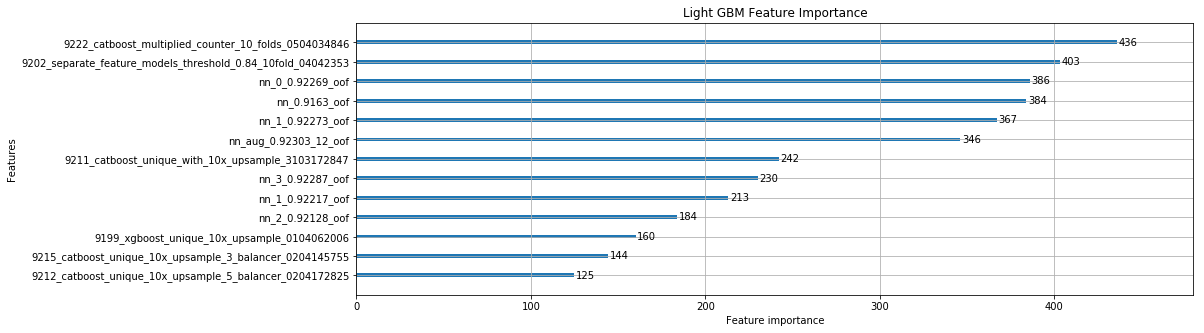

In [151]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(15, 5))
lgb.plot_importance(model, max_num_features=len(cols), ax=ax)
plt.title("Light GBM Feature Importance")

In [153]:
w = [0,100]

df["blend"] = (w[0]*df["lgb"]+w[1]*df["clf"])/sum(w)
dt["blend"] = (w[0]*dt["lgb"]+w[1]*dt["clf"])/sum(w)

print("\nROC AUC:", round(roc_auc_score(df.target, df["blend"]), 5))


ROC AUC: 0.92537


In [154]:
sub = pd.read_csv(intput_path+'sample_submission.csv.zip')
sub["target"] = dt["blend"]
sub.head()

,ID_code,target
0,test_0,0.144036
1,test_1,0.360064
2,test_2,0.315207
3,test_3,0.138877
4,test_4,0.050362


In [155]:
sub.to_csv(output_path + "best_blend_13.csv", index=False)

In [156]:
!ls ../output/

 best_auc_nn_0.pkl	  data_1_cont.pkl	  nn_2_0.92128_oof.npy
 best_auc_nn_1.pkl	  lgb_0.91145_oof.npy	  nn_2_0.92128_test.npy
 best_auc_nn_2.pkl	  lgb_0.91145_test.npy	  nn_3_0.92287_oof.npy
 best_auc_nn_3.pkl	  lgb_0.91305_oof.npy	  nn_3_0.92287_test.npy
 best_auc_nn.pkl	  lgb_0.91305_test.npy	  nn_aug_0.92303_12_oof.npy
 best_blend_10.csv	  models		  nn_aug_0.92303_12_test.npy
 best_blend_13.csv	  nn_0_0.92269_oof.npy	  predictions
 best_blend_7.csv	  nn_0_0.92269_test.npy   train_1.bin
 best_blend_8.csv	  nn_0.9163_oof.npy	  train_1.feather
 best_blend.csv		  nn_0.9163_test.npy	  train_1.npy
'!cat_0.91558_oof.npy'	  nn_1_0.92217_oof.npy	  valid_1.bin
'!cat_0.91558_test.npy'   nn_1_0.92217_test.npy   xgb_0.91221_oof.npy
 cat_0.91617_oof.npy	  nn_1_0.92273_oof.npy	  xgb_0.91221_test.npy
 cat_0.91617_test.npy	  nn_1_0.92273_test.npy


In [157]:
!kaggle competitions submit -c santander-customer-transaction-prediction -f ../output/best_blend_13.csv -m "0.92537 reg"

100%|███████████████████████████████████████| 6.17M/6.17M [00:06<00:00, 930kB/s]
Successfully submitted to Santander Customer Transaction Prediction